In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DAX

In [2]:
file_path = 'datasets/dax_close.csv'
dax = pd.read_csv(file_path)
dax['Date'] = pd.to_datetime(dax['Date'])
dax.set_index('Date', inplace=True)

### Check missing values

In [3]:
missing_values = dax.isnull().sum()
print(f"Number of missing values:\n{missing_values}")

Number of missing values:
ADS.DE     0
ALV.DE     0
BAS.DE     0
BAYN.DE    0
BMW.DE     0
DBK.DE     0
DTE.DE     0
FRE.DE     0
HEI.DE     0
MBG.DE     0
MUV2.DE    0
RWE.DE     0
SAP.DE     0
SIE.DE     0
VOW3.DE    0
dtype: int64


There are no missing values in `dax_close` dataset.

### Plot DAX stocks daily returns from 04/01/2001 to 29/11/2024

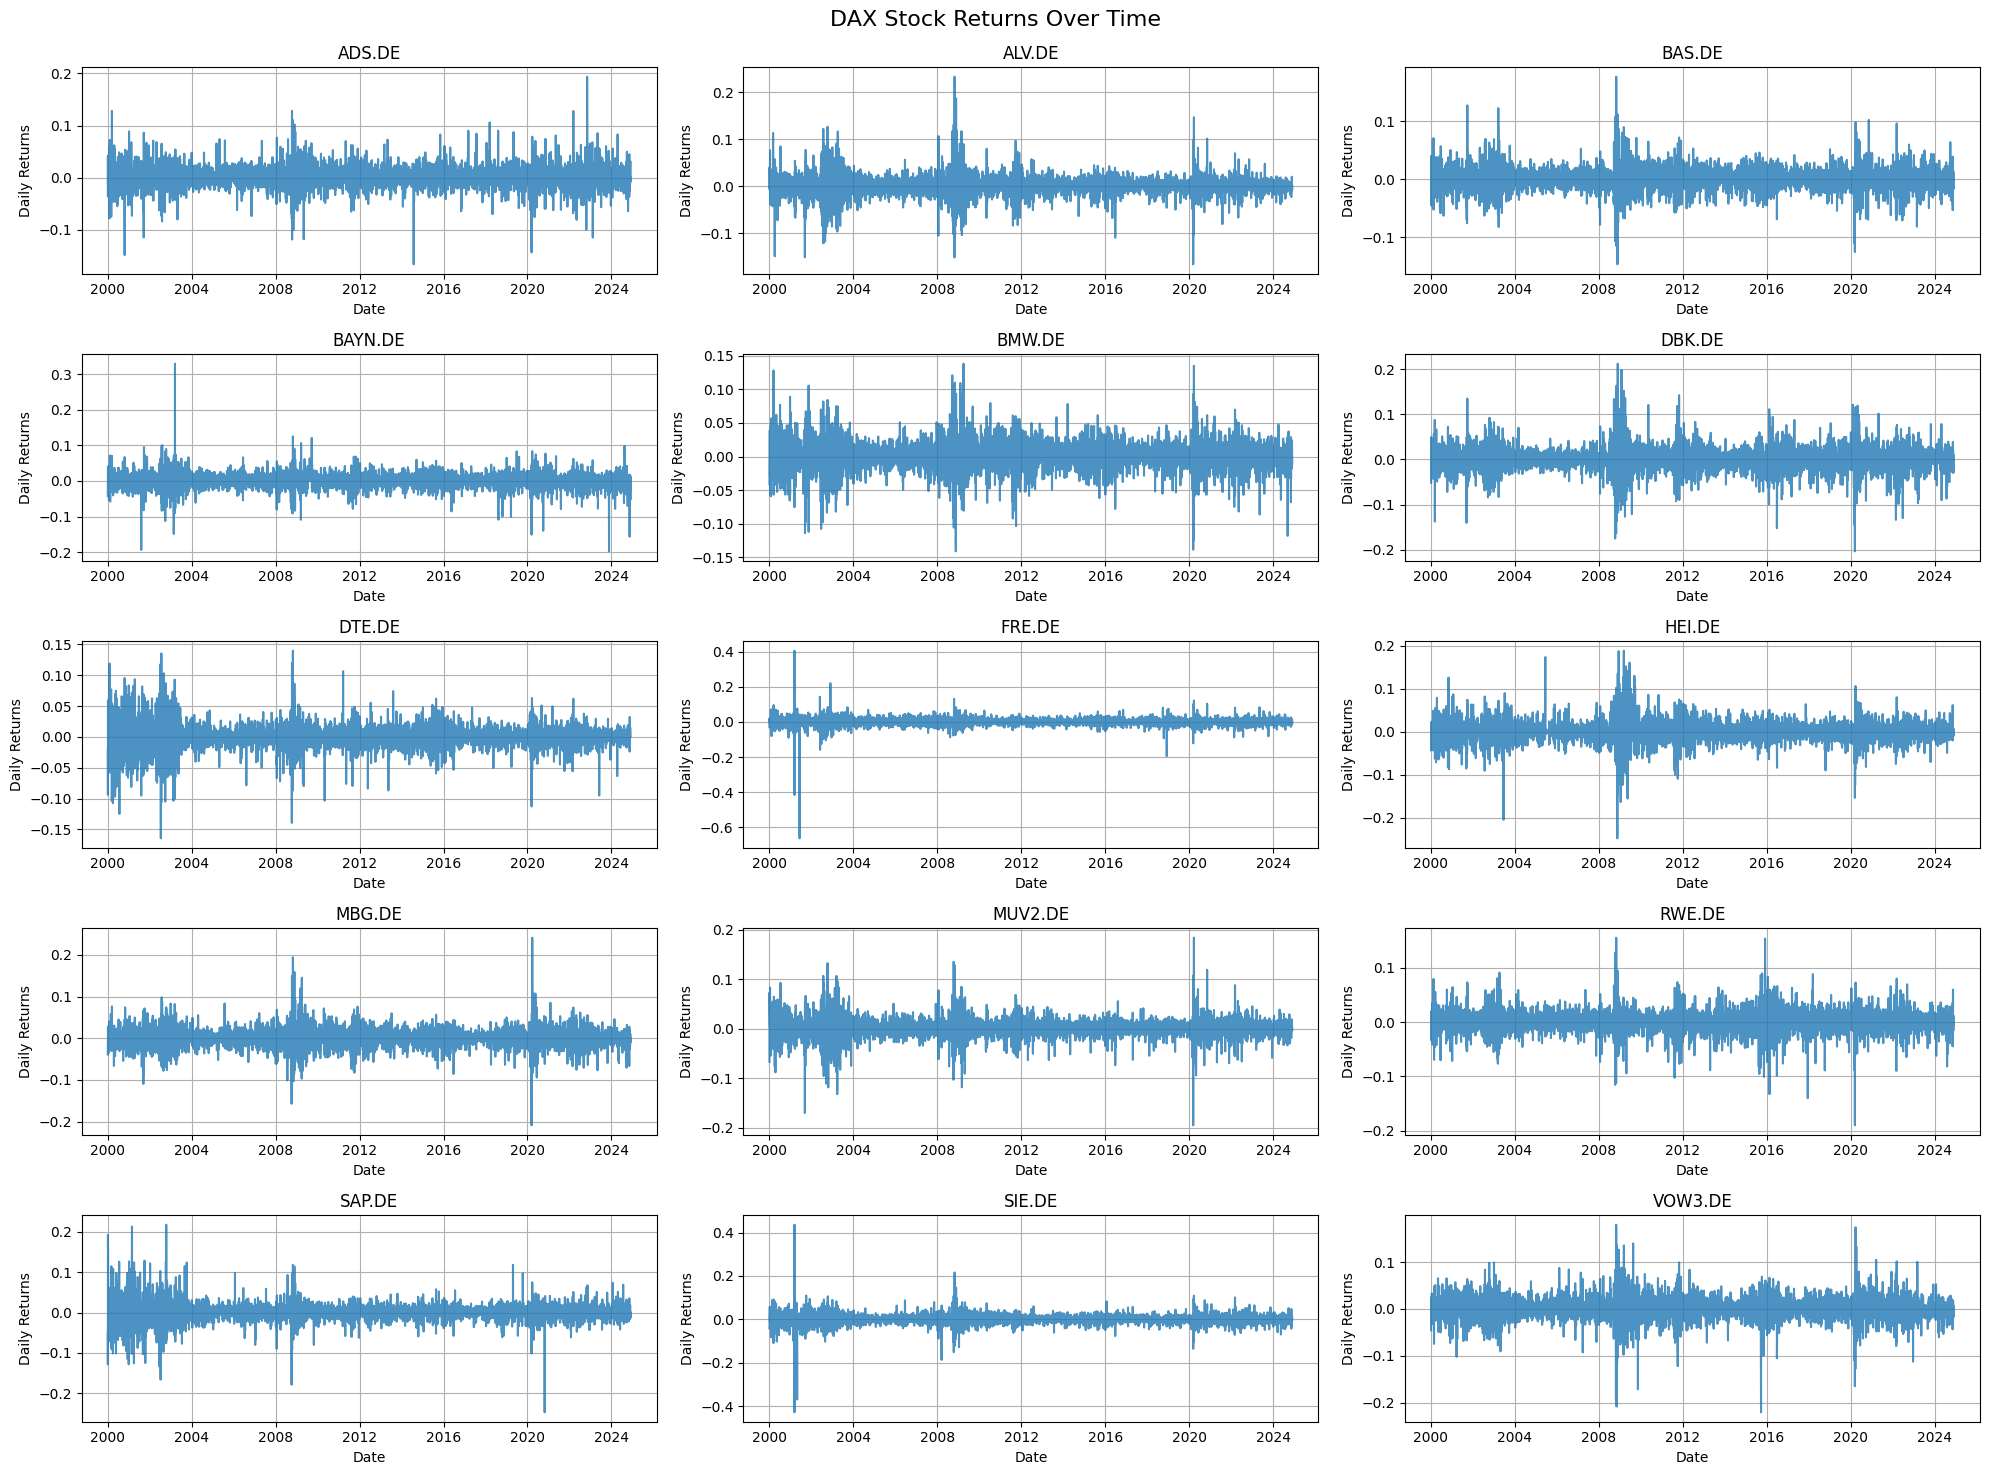

In [38]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 15))

axes = axes.flatten()

for i, stock in enumerate(dax.columns):
    axes[i].plot(dax.index, dax[stock], label=stock, alpha=0.8)
    axes[i].set_title(f'{stock}', fontsize=12)
    axes[i].set_xlabel('Date', fontsize=10)
    axes[i].set_ylabel('Daily Returns', fontsize=10)
    axes[i].grid(True)

fig.suptitle(f'DAX Stock Returns Over Time', fontsize=16 )
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

### Descriptive statistics

In [5]:
dax.describe()

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BMW.DE,DBK.DE,DTE.DE,FRE.DE,HEI.DE,MBG.DE,MUV2.DE,RWE.DE,SAP.DE,SIE.DE,VOW3.DE
count,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000
mean,0.000388,-0.000015,0.000078,-0.000139,0.000132,-0.000226,-0.000136,0.000113,0.000082,-0.000032,0.000103,-0.000034,0.000263,0.000079,0.000148
std,0.019578,0.020618,0.018251,0.020125,0.020383,0.025349,0.019055,0.022110,0.022685,0.021535,0.018972,0.019369,0.021560,0.022482,0.023262
min,-0.166886,-0.166382,-0.146707,-0.197980,-0.141391,-0.203783,-0.164362,-0.662510,-0.247604,-0.208896,-0.195309,-0.189918,-0.247661,-0.428488,-0.220877
25%,-0.009120,-0.008186,-0.008898,-0.009473,-0.009781,-0.012073,-0.007846,-0.008949,-0.010132,-0.010237,-0.007624,-0.009252,-0.008301,-0.009610,-0.010804
50%,0.000000,0.000343,0.000162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000283,0.000000,0.000246,0.000000,0.000000
75%,0.009754,0.008716,0.009406,0.009898,0.010093,0.012147,0.007888,0.009540,0.010684,0.010275,0.008200,0.009962,0.009288,0.010095,0.011469
max,0.193787,0.233053,0.176407,0.330059,0.138356,0.212448,0.139890,0.405465,0.187897,0.241193,0.183778,0.154904,0.217841,0.435906,0.179723


Mean daily returns of DAX stocks are close to 0.

Median daily returns for almost all stocks is equal to 0 (except ALV.DE, BAS.DE, SAP.DE).

BAS.DE has **the smallest standard deviation** among observed DAX stocks.

DBK.DE has **the largest standard deviation** among observed DAX stocks.



In [40]:
volatility = dax.std().sort_values(ascending=False)
print("Most Volatile DAX Stocks:")
print(volatility.head(5))
print("\nLeast Volatile DAX Stocks:")
print(volatility.tail(5))

Most Volatile DAX Stocks:
DBK.DE     0.025349
VOW3.DE    0.023262
HEI.DE     0.022685
SIE.DE     0.022482
FRE.DE     0.022110
dtype: float64

Least Volatile DAX Stocks:
ADS.DE     0.019578
RWE.DE     0.019369
DTE.DE     0.019055
MUV2.DE    0.018972
BAS.DE     0.018251
dtype: float64


In [7]:
min_returns = dax.min()
max_returns = dax.max()
mean_returns = dax.mean()

print("Minimum Returns:")
print(min_returns)
print("\nMaximum Returns:")
print(max_returns)
print("\nMean Returns:")
print(mean_returns)

Minimum Returns:
ADS.DE    -0.166886
ALV.DE    -0.166382
BAS.DE    -0.146707
BAYN.DE   -0.197980
BMW.DE    -0.141391
DBK.DE    -0.203783
DTE.DE    -0.164362
FRE.DE    -0.662510
HEI.DE    -0.247604
MBG.DE    -0.208896
MUV2.DE   -0.195309
RWE.DE    -0.189918
SAP.DE    -0.247661
SIE.DE    -0.428488
VOW3.DE   -0.220877
dtype: float64

Maximum Returns:
ADS.DE     0.193787
ALV.DE     0.233053
BAS.DE     0.176407
BAYN.DE    0.330059
BMW.DE     0.138356
DBK.DE     0.212448
DTE.DE     0.139890
FRE.DE     0.405465
HEI.DE     0.187897
MBG.DE     0.241193
MUV2.DE    0.183778
RWE.DE     0.154904
SAP.DE     0.217841
SIE.DE     0.435906
VOW3.DE    0.179723
dtype: float64

Mean Returns:
ADS.DE     0.000388
ALV.DE    -0.000015
BAS.DE     0.000078
BAYN.DE   -0.000139
BMW.DE     0.000132
DBK.DE    -0.000226
DTE.DE    -0.000136
FRE.DE     0.000113
HEI.DE     0.000082
MBG.DE    -0.000032
MUV2.DE    0.000103
RWE.DE    -0.000034
SAP.DE     0.000263
SIE.DE     0.000079
VOW3.DE    0.000148
dtype: float64


### Distribution of Daily DAX Stock Returns

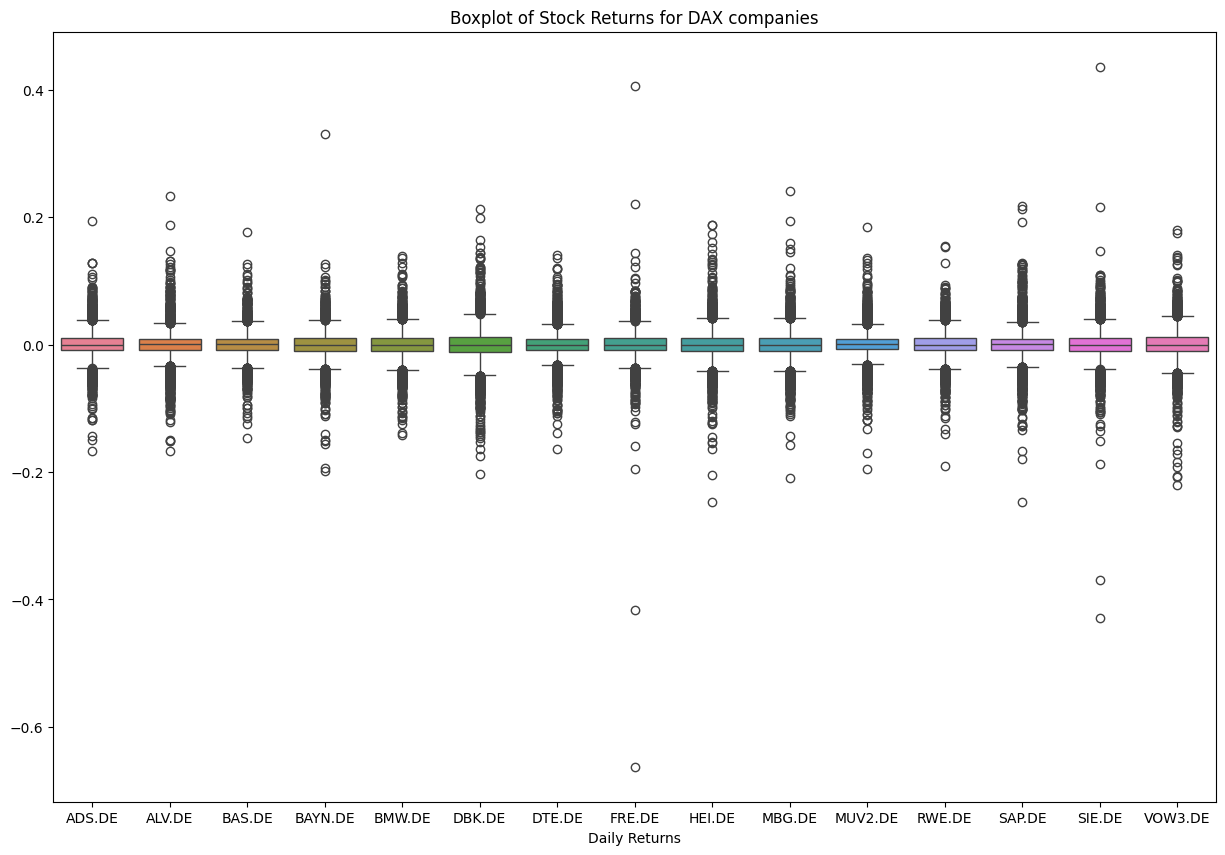

In [37]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=dax, orient='v')
plt.title('Boxplot of Stock Returns for DAX companies')
plt.xlabel('Daily Returns')
plt.show()

According ti this boxplot we can see that DAX stock daily returns have


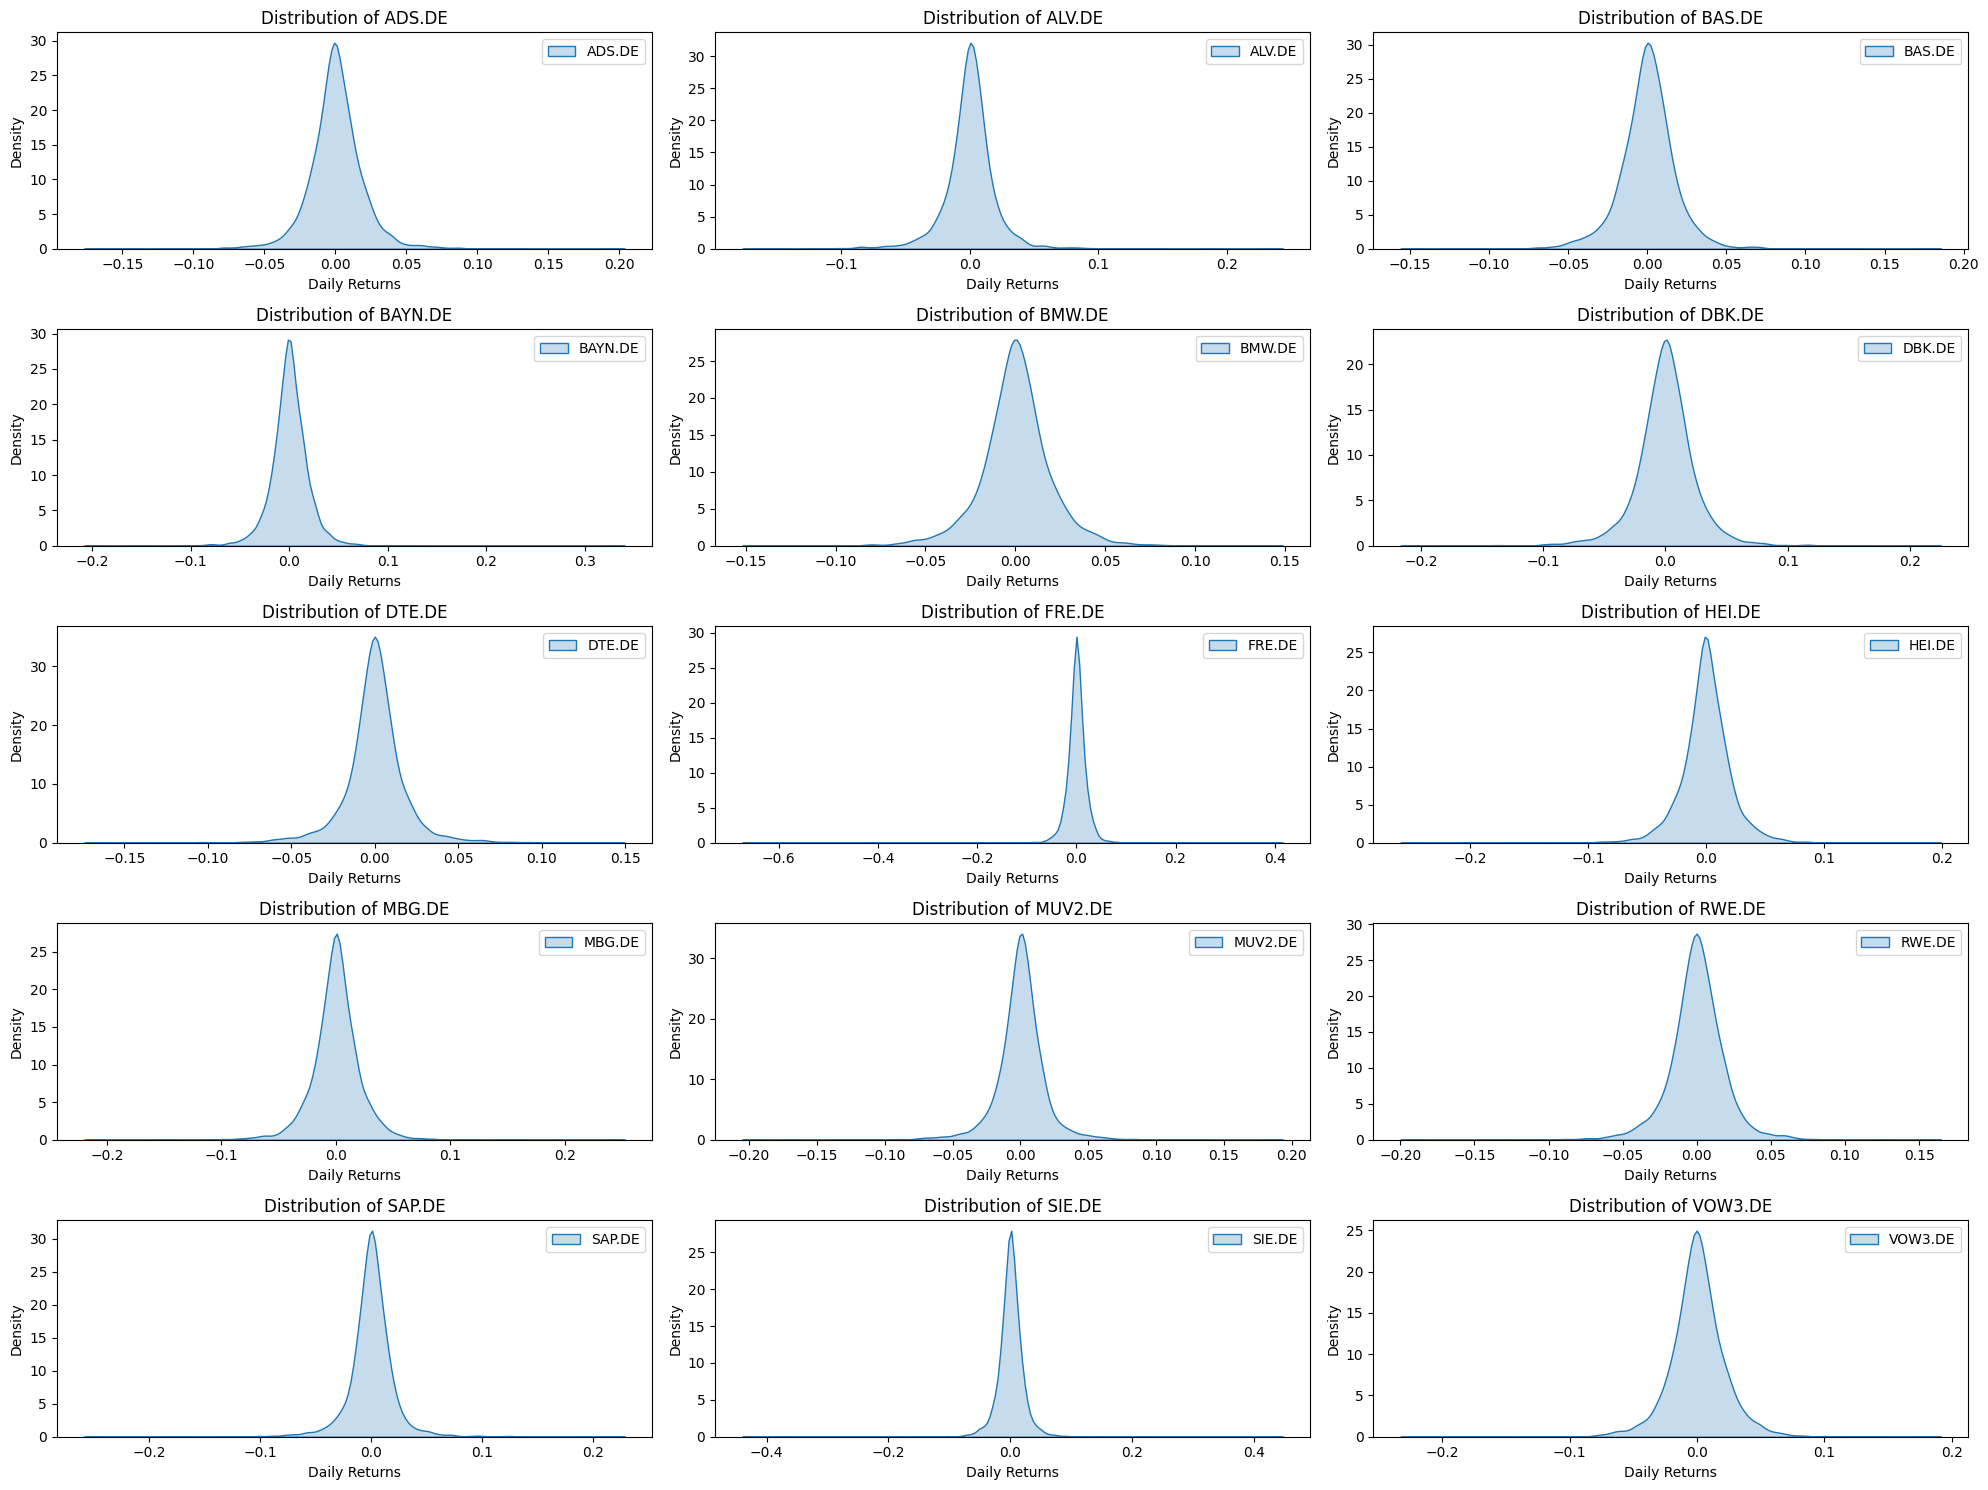

In [9]:
fig, axes = plt.subplots(5, 3, figsize=(20, 15))
axes = axes.flatten()

for i, stock in enumerate(dax.columns):
    sns.kdeplot(dax[stock], ax=axes[i], fill=True, label=stock)
    axes[i].set_title(f'Distribution of {stock}')
    axes[i].set_xlabel('Daily Returns')
    axes[i].set_ylabel('Density')
    axes[i].legend()
    # axes[i].grid(True)

for j in range(len(dax.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Correlation between DAX Stock Daily Returns

In [10]:
correlation_matrix = dax.corr()

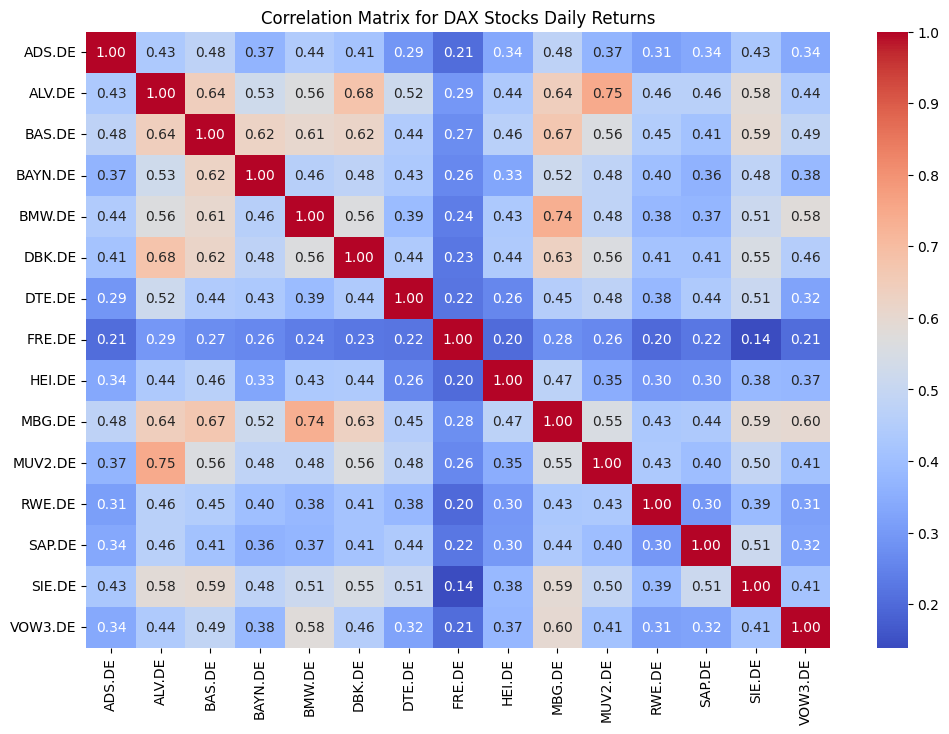

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for DAX Stocks Daily Returns')
plt.show()

DAX stock daily returns have only weak and strong positive linear dependencies.

## S&P 500

In [12]:
sp500 = pd.read_csv("datasets/sp500_close.csv")
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500.set_index('Date', inplace=True)

In [13]:
missing_values = sp500.isnull().sum()
print(f"Number of missing values:\n{missing_values}")

Number of missing values:
A       0
AAPL    0
ABT     0
ADBE    0
ADI     0
       ..
WMT     0
WY      0
XEL     0
XOM     0
YUM     0
Length: 252, dtype: int64


### Descriptive statistics

In [41]:
sp500.describe()

,A,AAPL,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,...,WEC,WELL,WFC,WM,WMB,WMT,WY,XEL,XOM,YUM
count,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,...,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000
mean,0.000157,0.000873,0.000323,0.000550,0.000251,0.000257,0.000320,0.000567,0.000171,0.000184,...,0.000377,0.000350,0.000217,0.000411,0.000148,0.000227,-0.000123,0.000214,0.000176,0.000484
std,0.025520,0.025290,0.015177,0.026820,0.025527,0.019375,0.015826,0.025957,0.013859,0.015462,...,0.012892,0.018958,0.023707,0.015231,0.034694,0.014711,0.024322,0.016953,0.016639,0.017657
min,-0.315925,-0.731248,-0.175992,-0.353223,-0.181700,-0.277034,-0.268915,-0.235072,-0.190858,-0.258574,...,-0.199074,-0.279654,-0.272101,-0.137007,-0.942802,-0.120765,-0.964782,-0.458346,-0.150271,-0.232854
25%,-0.010070,-0.009957,-0.007039,-0.010866,-0.011585,-0.008737,-0.006574,-0.011555,-0.006378,-0.006803,...,-0.005999,-0.007624,-0.008442,-0.006120,-0.011035,-0.006589,-0.010076,-0.006302,-0.007945,-0.007490
50%,0.000613,0.000893,0.000322,0.000854,0.000458,0.000611,0.000480,0.000953,0.000583,0.000713,...,0.000785,0.001160,0.000155,0.000586,0.000843,0.000365,0.000282,0.000492,0.000258,0.000542
75%,0.011039,0.012614,0.008133,0.012347,0.011652,0.009784,0.007838,0.013283,0.007363,0.007523,...,0.007237,0.008819,0.008766,0.006831,0.012170,0.006954,0.010179,0.007474,0.008612,0.008510
max,0.386773,0.130194,0.117484,0.214885,0.164755,0.159887,0.111785,0.156106,0.163830,0.181002,...,0.123519,0.208467,0.283407,0.233094,0.698185,0.110723,0.225664,0.210798,0.158631,0.209032


In [57]:
volatility = sp500.std().sort_values(ascending=False)
print("Most Volatile S&P 500 Stocks:")
print(volatility.head(10))
print("\nLeast Volatile S&P 500 Stocks:")
print(volatility.tail(10))

Most Volatile S&P 500 Stocks:
AKAM    0.038776
NVDA    0.037330
BKNG    0.037297
WDC     0.035534
AIG     0.035410
MU      0.034934
WMB     0.034694
NTAP    0.034114
PWR     0.033342
FCX     0.032482
dtype: float64

Least Volatile S&P 500 Stocks:
CL     0.013506
PG     0.013411
KMB    0.013058
SO     0.012988
KO     0.012933
WEC    0.012892
PEP    0.012547
ED     0.012422
GIS    0.012363
JNJ    0.012088
dtype: float64


In [54]:
min_returns = sp500.min().sort_values()[:10]
max_returns = sp500.max().sort_values(ascending=False)[:10]
mean_returns = sp500.mean().sort_values()

print("Minimum Returns:")
print(min_returns)
print("\nMaximum Returns:")
print(max_returns)
print("\nMean Returns:")
print(mean_returns)

Minimum Returns:
MO    -1.201673
PWR   -1.141077
WY    -0.964782
ROK   -0.952892
WMB   -0.942802
AIG   -0.936258
JCI   -0.929398
STT   -0.892504
APA   -0.773593
OXY   -0.764110
dtype: float64

Maximum Returns:
HIG     0.704867
WMB     0.698185
MS      0.625850
AIG     0.506818
CNP     0.488353
FITB    0.472288
C       0.456316
KEY     0.433421
HBAN    0.405959
DVA     0.405465
dtype: float64

Mean Returns:
AIG    -0.000461
C      -0.000275
AKAM   -0.000196
WBA    -0.000184
AES    -0.000163
          ...   
UNH     0.000719
AZO     0.000741
ORLY    0.000758
AAPL    0.000873
NVDA    0.001158
Length: 252, dtype: float64


### Plot S&P 500 stocks daily returns from 04/01/2001 to 29/11/2024


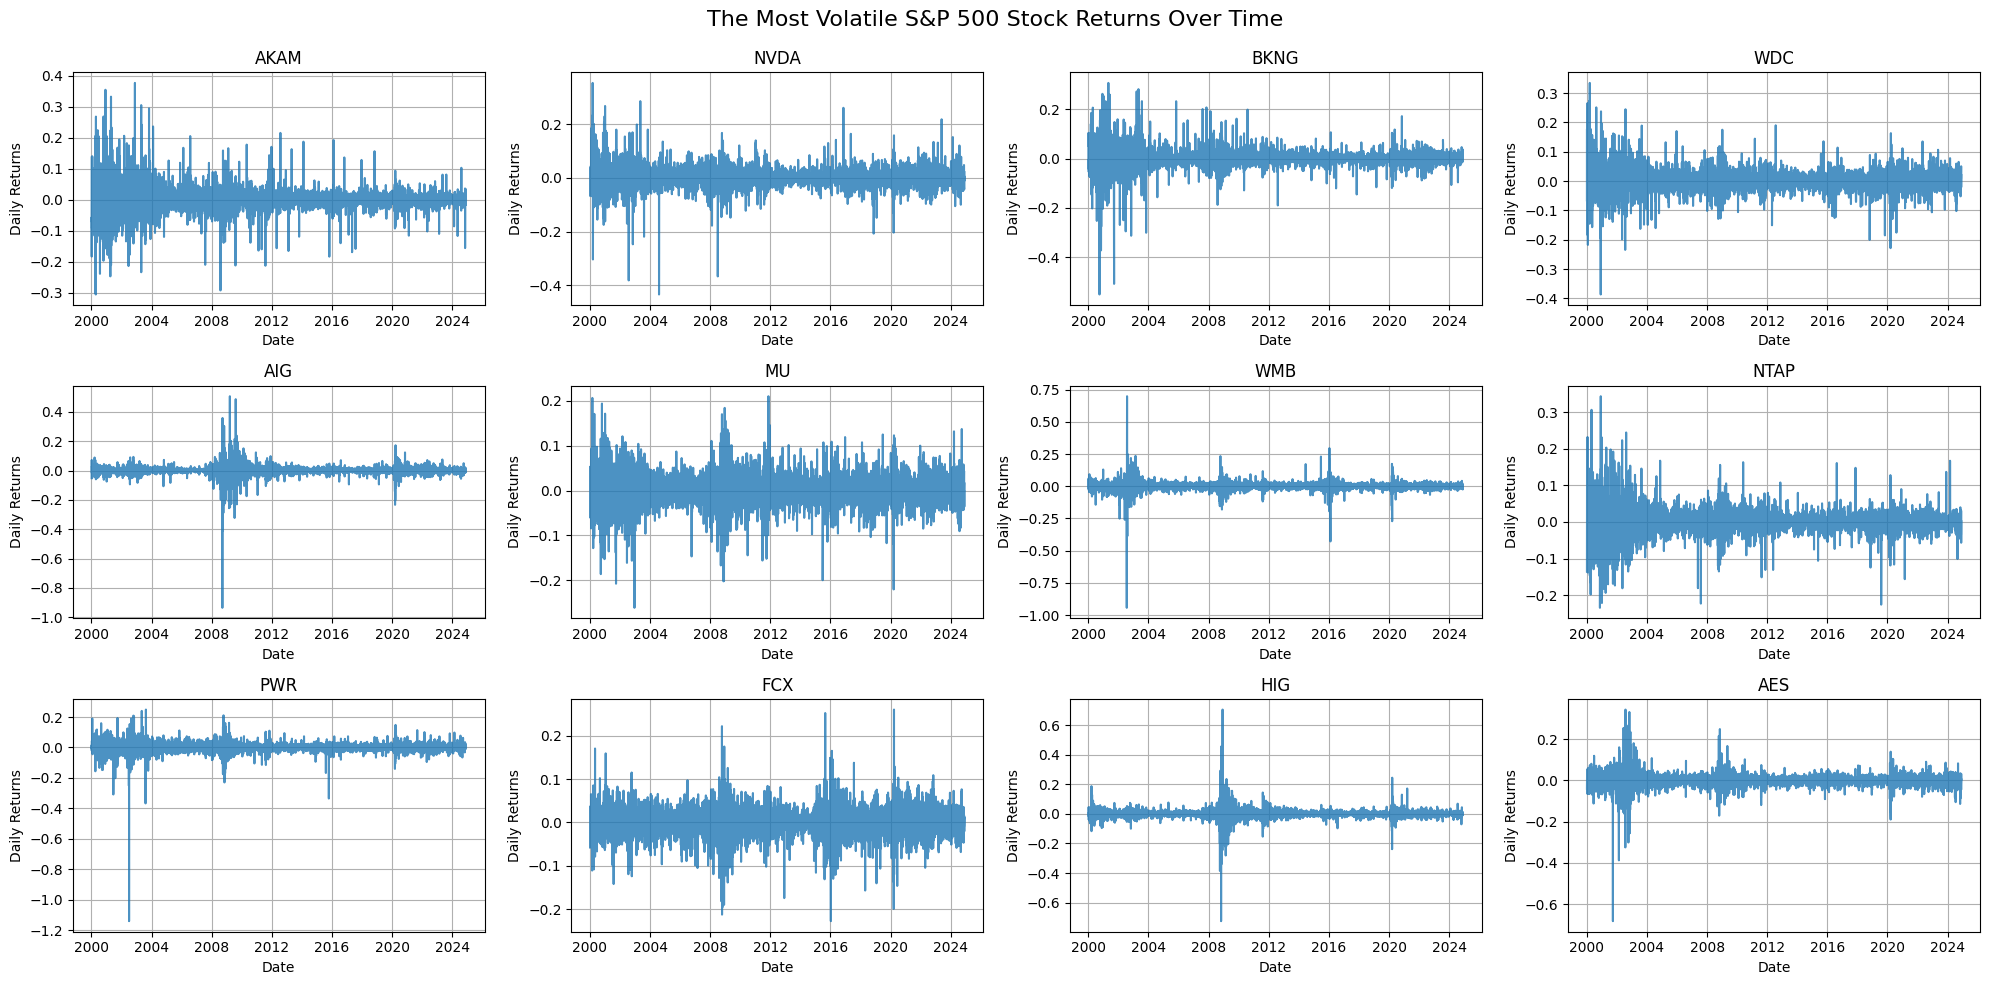

In [70]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))

axes = axes.flatten()

for i, stock in enumerate(volatility.head(12).index):
    axes[i].plot(sp500.index, sp500[stock], label=stock, alpha=0.8)
    axes[i].set_title(f'{stock}', fontsize=12)
    axes[i].set_xlabel('Date', fontsize=10)
    axes[i].set_ylabel('Daily Returns', fontsize=10)
    axes[i].grid(True)

fig.suptitle(f'The Most Volatile S&P 500 Stock Returns Over Time', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

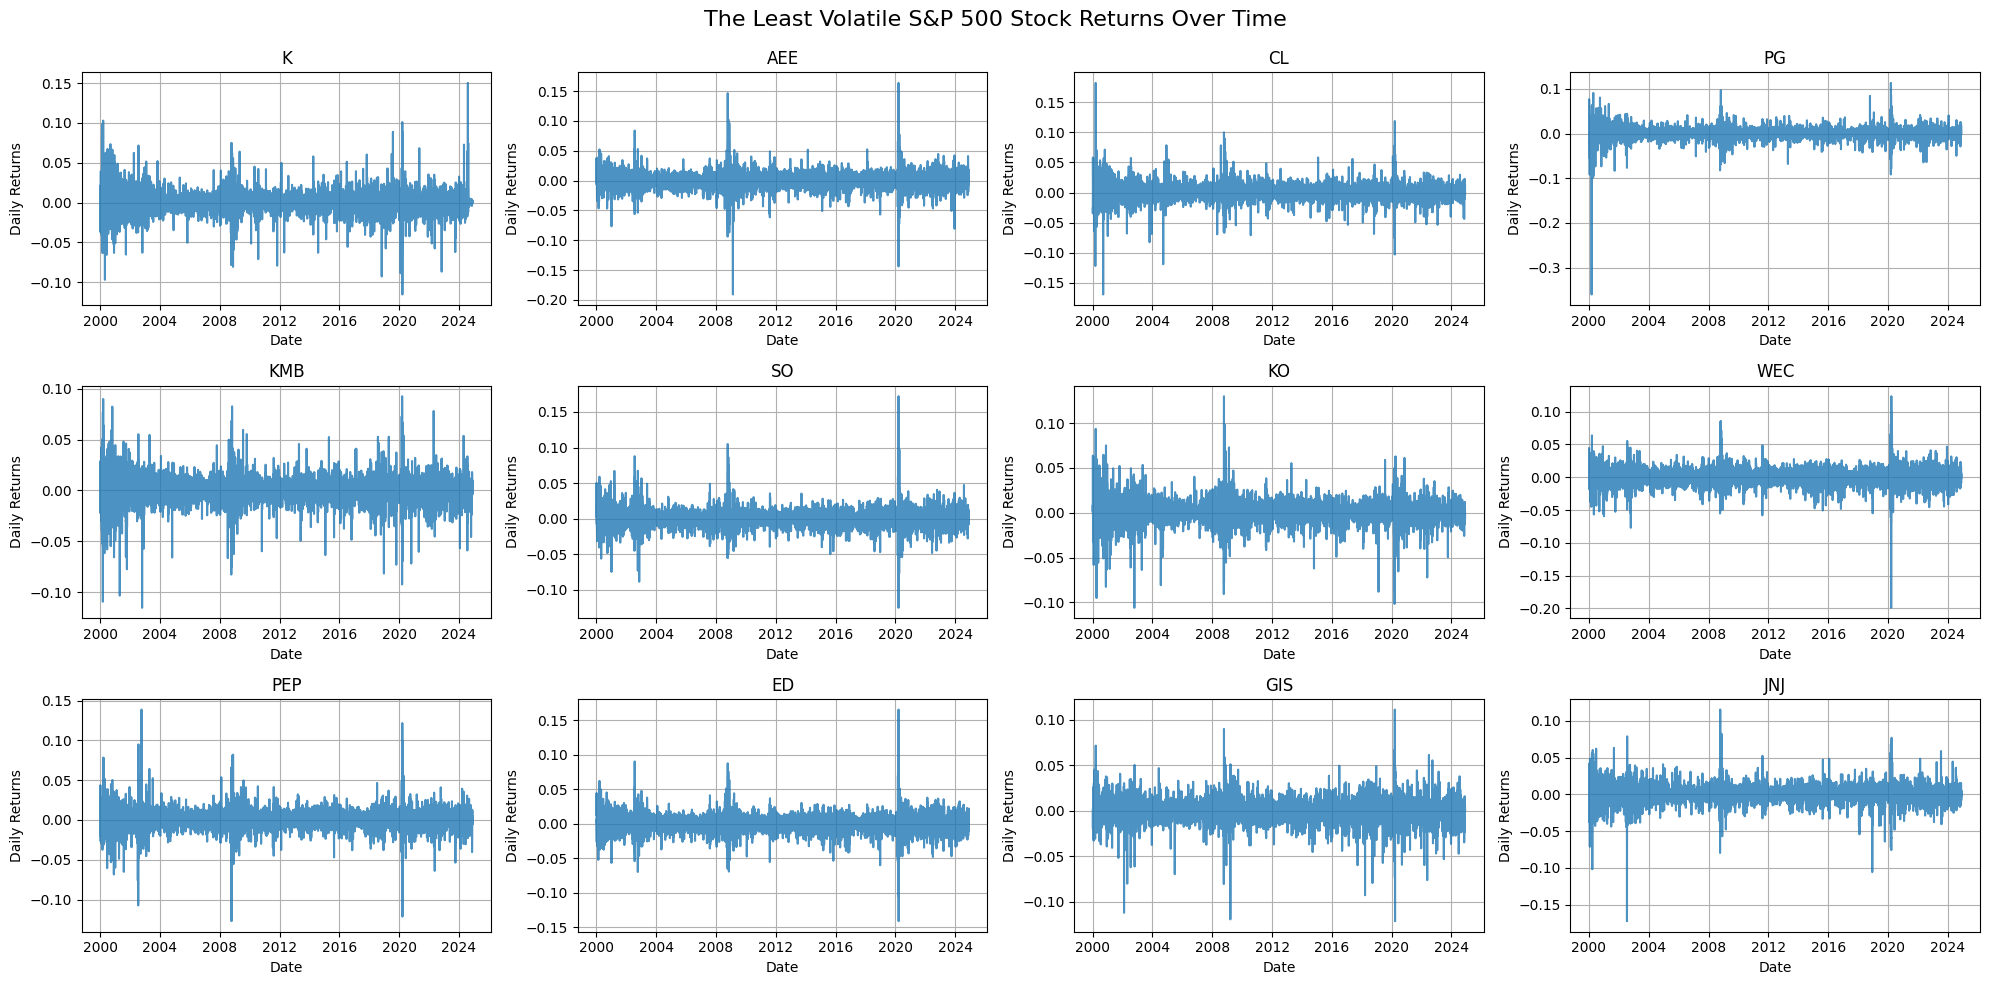

In [71]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))

axes = axes.flatten()

for i, stock in enumerate(volatility.tail(12).index):
    axes[i].plot(sp500.index, sp500[stock], label=stock, alpha=0.8)
    axes[i].set_title(f'{stock}', fontsize=12)
    axes[i].set_xlabel('Date', fontsize=10)
    axes[i].set_ylabel('Daily Returns', fontsize=10)
    axes[i].grid(True)

fig.suptitle(f'The Least Volatile S&P 500 Stock Returns Over Time', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

### Distribution of Daily S&P 500 Stock Returns

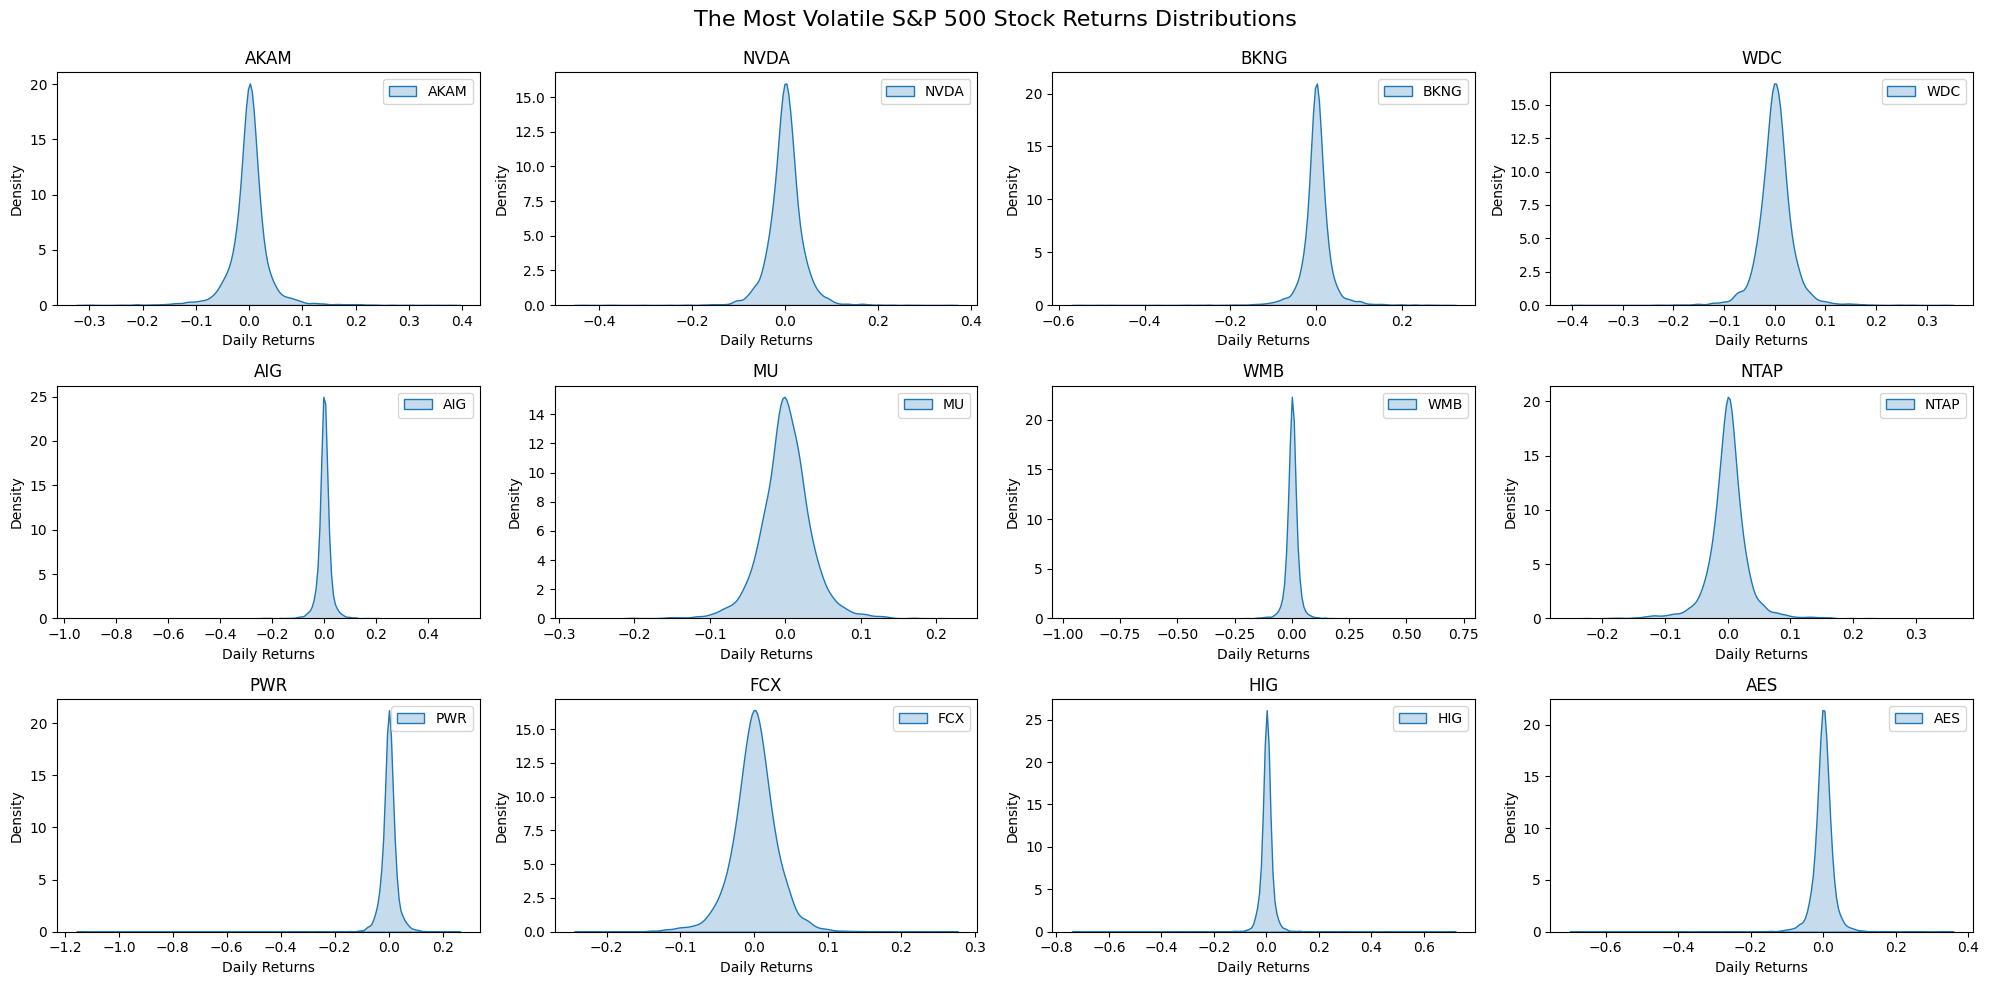

In [89]:
fig, axes = plt.subplots(3, 4, figsize=(20, 10))
axes = axes.flatten()

for i, stock in enumerate(volatility.head(12).index):
    sns.kdeplot(sp500[stock], ax=axes[i], fill=True, label=stock)
    axes[i].set_title(f'{stock}')
    axes[i].set_xlabel('Daily Returns')
    axes[i].set_ylabel('Density')
    axes[i].legend()
    # axes[i].grid(True)

for j in range(len(sp500.columns), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle(f'The Most Volatile S&P 500 Stock Returns Distributions', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

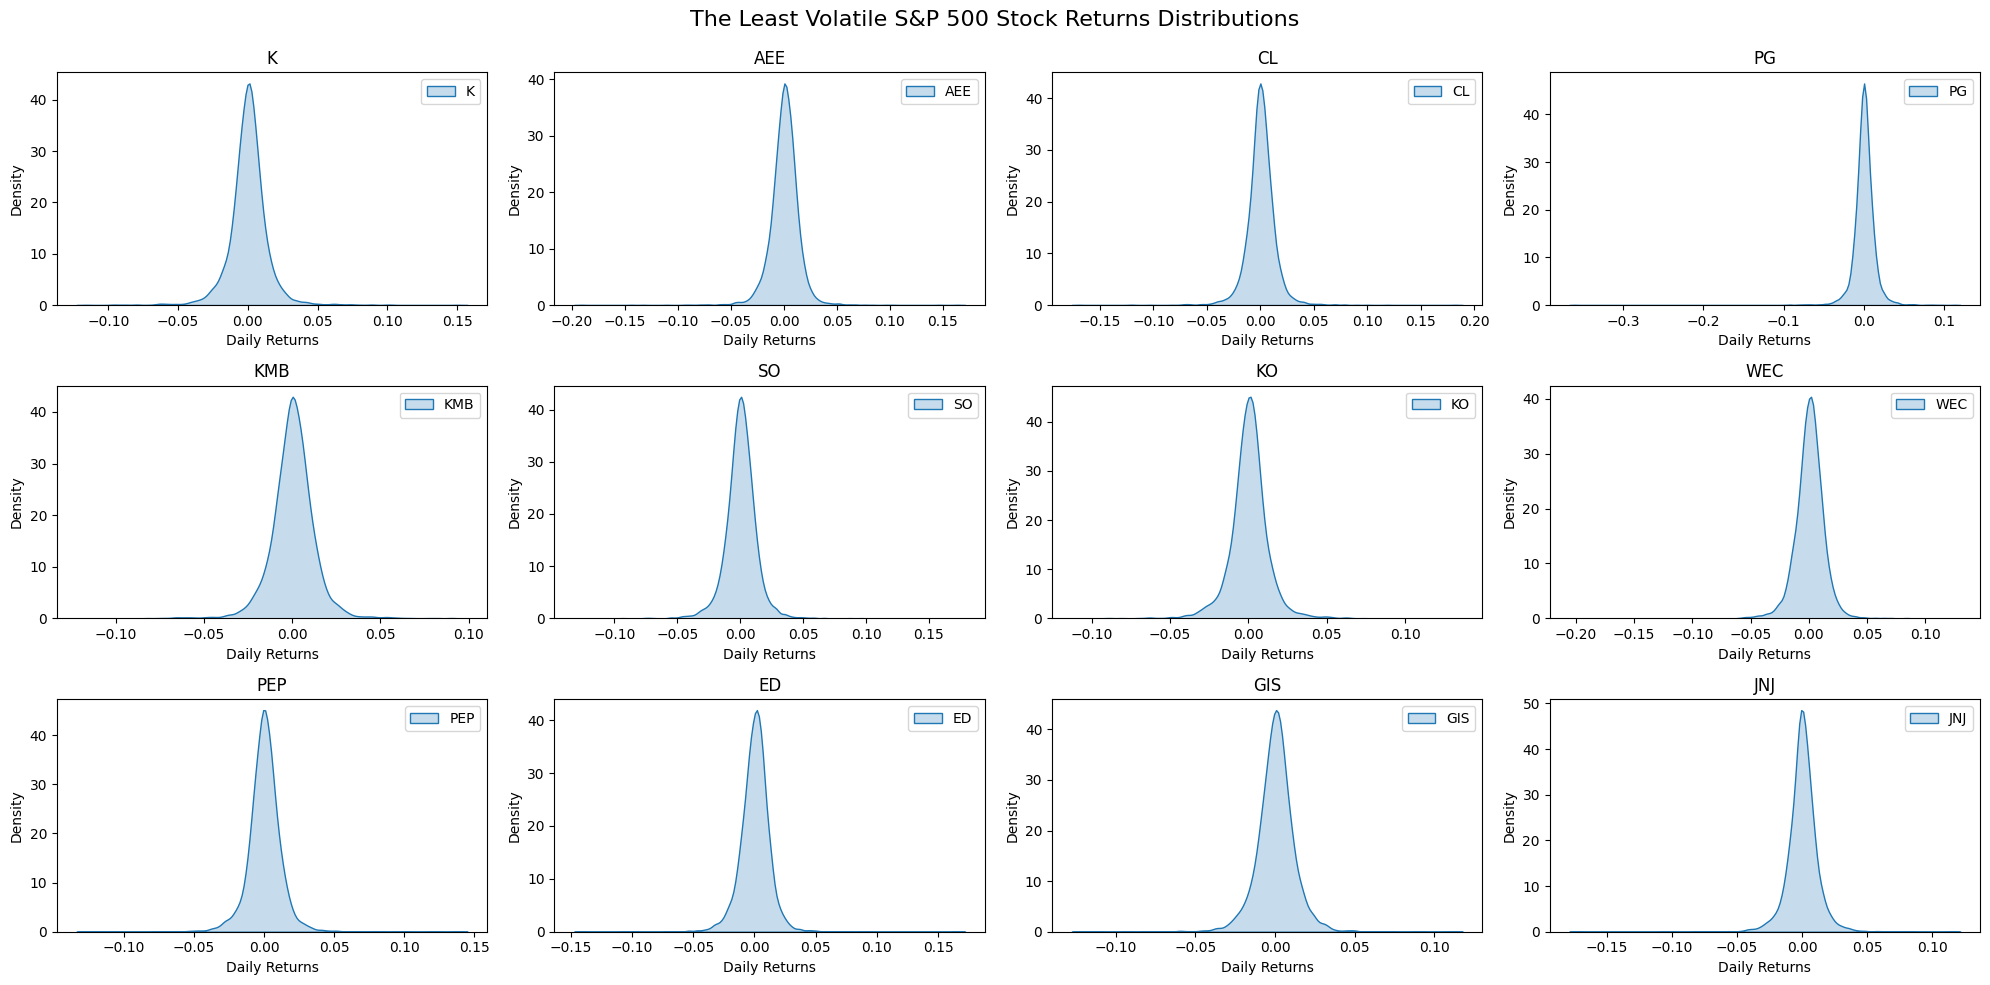

In [90]:
fig, axes = plt.subplots(3, 4, figsize=(20, 10))
axes = axes.flatten()

for i, stock in enumerate(volatility.tail(12).index):
    sns.kdeplot(sp500[stock], ax=axes[i], fill=True, label=stock)
    axes[i].set_title(f'{stock}')
    axes[i].set_xlabel('Daily Returns')
    axes[i].set_ylabel('Density')
    axes[i].legend()
    # axes[i].grid(True)

for j in range(len(sp500.columns), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle(f'The Least Volatile S&P 500 Stock Returns Distributions', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

### Correlation between S&P 500 Stock Daily Returns

In [72]:
correlation_matrix = sp500.corr()
correlation_matrix

,A,AAPL,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,...,WEC,WELL,WFC,WM,WMB,WMT,WY,XEL,XOM,YUM
A,1.000000,0.366998,0.258164,0.428435,0.532606,0.269965,0.380860,0.438450,0.247351,0.226059,...,0.207745,0.260720,0.313155,0.303457,0.277839,0.255148,0.328023,0.177430,0.296422,0.321401
AAPL,0.366998,1.000000,0.219010,0.424879,0.434564,0.218267,0.327998,0.385210,0.206323,0.196931,...,0.175460,0.242555,0.279205,0.255868,0.219601,0.249884,0.260900,0.161514,0.258781,0.245732
ABT,0.258164,0.219010,1.000000,0.269648,0.243812,0.284171,0.403917,0.274996,0.374200,0.328944,...,0.362836,0.237533,0.304794,0.331650,0.200348,0.303941,0.292195,0.298067,0.325629,0.327615
ADBE,0.428435,0.424879,0.269648,1.000000,0.511556,0.241133,0.401175,0.510022,0.260670,0.231521,...,0.205771,0.277332,0.302761,0.293914,0.227733,0.266525,0.299559,0.204803,0.260835,0.304235
ADI,0.532606,0.434564,0.243812,0.511556,1.000000,0.262505,0.412043,0.464861,0.219722,0.192275,...,0.177816,0.272812,0.309906,0.286052,0.256068,0.232691,0.322769,0.190990,0.291531,0.307183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WMT,0.255148,0.249884,0.303941,0.266525,0.232691,0.269489,0.355463,0.232261,0.304812,0.284902,...,0.294890,0.248402,0.278075,0.328865,0.160022,1.000000,0.271952,0.232151,0.282072,0.305995
WY,0.328023,0.260900,0.292195,0.299559,0.322769,0.345684,0.407661,0.317780,0.361448,0.310705,...,0.310851,0.433549,0.444615,0.355049,0.290632,0.271952,1.000000,0.254876,0.403830,0.360272
XEL,0.177430,0.161514,0.298067,0.204803,0.190990,0.266983,0.315090,0.175630,0.627684,0.609969,...,0.588889,0.298230,0.230359,0.297882,0.193697,0.232151,0.254876,1.000000,0.293309,0.249002
XOM,0.296422,0.258781,0.325629,0.260835,0.291531,0.449535,0.435509,0.299983,0.418944,0.367698,...,0.342648,0.366490,0.440111,0.351630,0.419200,0.282072,0.403830,0.293309,1.000000,0.346816


In [73]:
# plt.figure(figsize=(200, 220))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Matrix')
# plt.show()

In [74]:
min_corr = sp500[['APA', 'ADI', 'AKAM', 'BKNG', 'CLX', 'CPB', 'GILD', 'HBAN', 'KR', 'LUV', 'NEM', 'NVDA', ]]

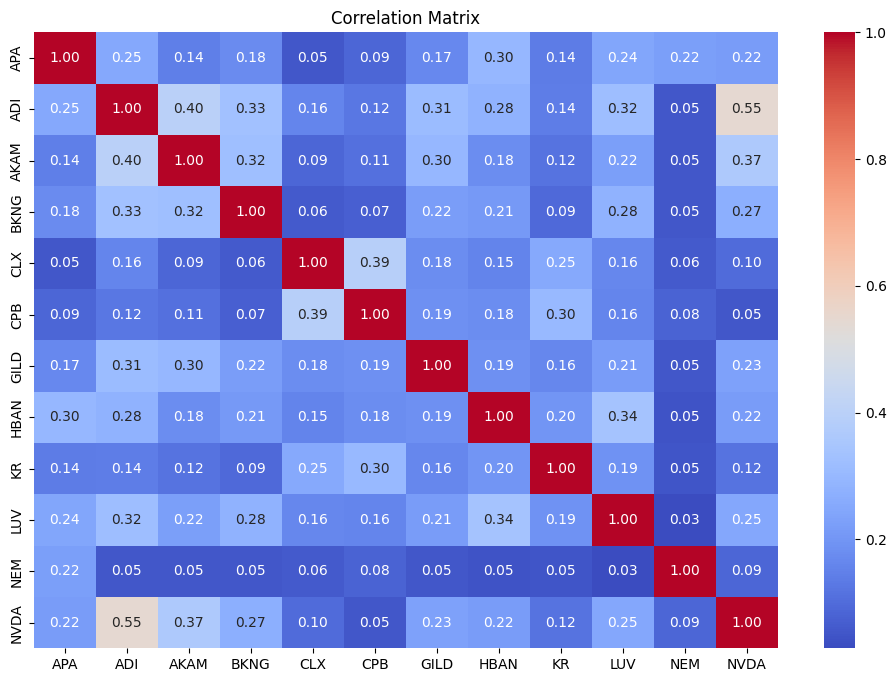

In [75]:
correlation_matrix = min_corr.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [76]:
max_corr = sp500[['AMAT', 'BAC', 'BXP', 'C', 'COP', 'CVX', 'DHI', 'GS', 'KIM', 'KLAC', 'LEN', 'MS', 'PHM', 'SPG', 'WFC', 'XOM']]

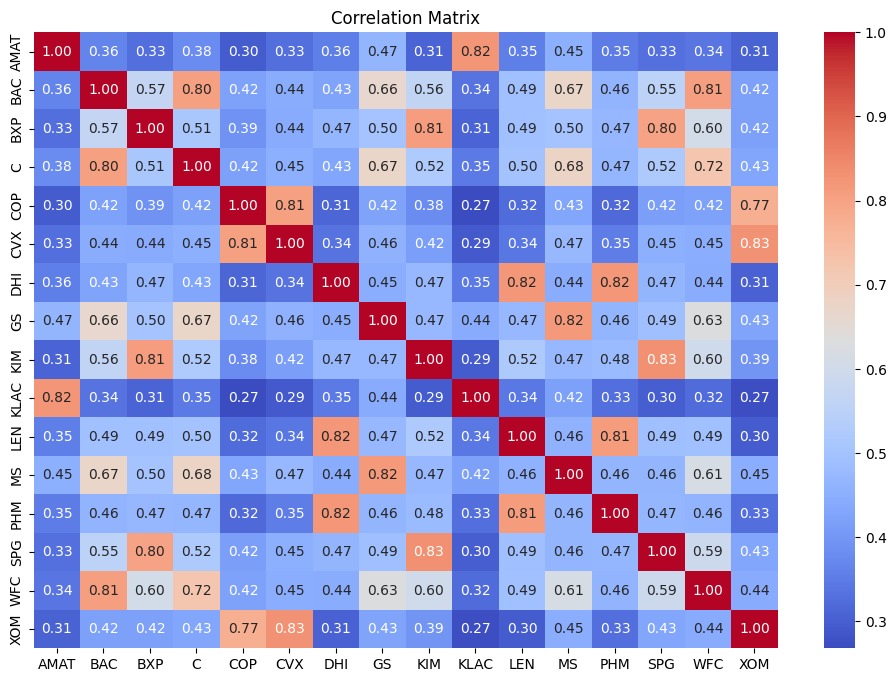

In [77]:
correlation_matrix = max_corr.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()